Posttest 6 Unsuvervised Learning

In [164]:
# info, dataset yang saya gunakan merupakan dataset baru yang sudah bersih :D

# Import Library | pandas | Matplotlib | sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import Module | Sklearn | KMeans Clustering | Partitional
from sklearn.cluster import KMeans

# Import Module | Sklearn | Hierarchical Clustering | Hierarchical
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, complete


# Import untuk menghilangkan warning 
import warnings
warnings.filterwarnings('ignore')

In [165]:
# Baca Berkas CSV - Dataset
country = pd.read_csv("Country-data.csv")
country.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [166]:
# Import CSV ket. dari dataset Country-data.csv
dict = pd.read_csv("data-dictionary.csv")
dict.head(11)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [167]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [168]:
# Akses DataFrame
# df.loc = Access a group of rows and columns by label(s) or a boolean array.
# link https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
df_country = df.loc[:]
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [169]:
# KMeans Clustering

In [190]:
# Membuat objek model
model = KMeans(n_clusters=3)

# Memilih atribut yang ingin dilatih
df_country["country"] = df_country.country
points = df_country[["exports","imports"]]

# proses fit/pencocokan pada model
model.fit(points)

# menentukan label cluster
labels = model.labels_ 

print(labels)

[2 2 2 1 1 2 2 2 1 2 2 1 2 2 1 1 1 2 1 2 2 1 2 1 1 2 2 1 2 2 1 2 2 2 2 2 2
 1 1 2 1 2 1 1 1 2 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 2 1
 2 2 2 2 1 2 2 1 1 1 2 1 1 1 1 1 1 0 1 2 2 1 1 2 0 1 1 1 1 1 1 2 2 2 1 2 1
 2 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 1 1 1 2 1 2 2 2 2 1 2 1 2 2
 1 2 1 2 1 2 1 2 1 1 2 2 2 2 1 2 1 2 2]


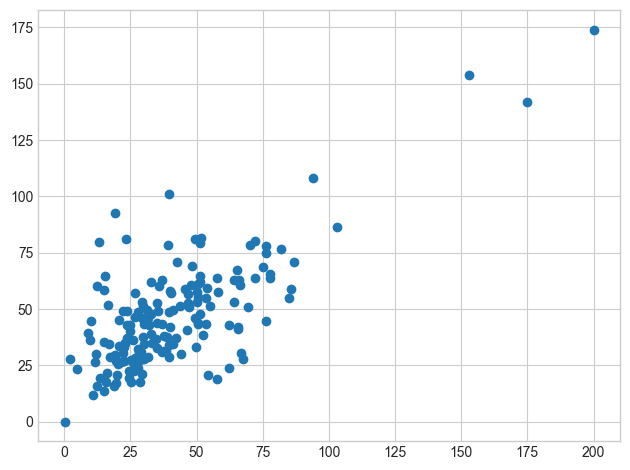

In [191]:
# Mengecek data points sebelum dilatih
plt.scatter(points["exports"], points["imports"])

In [192]:
# Membuat dataset KMeans
dsk_country = pd.DataFrame({
    "labels": labels,
    "country": df_country.country
})

In [193]:
# Membuat Crosstab
ct_country = pd.crosstab(dsk_country["labels"], dsk_country["country"])
ct_country

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
labels,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,1,1,1,0,0,1,1,1,0,1,...,0,1,1,1,1,0,1,0,1,1


In [194]:
# Menentukan Centroid
ctr = model.cluster_centers_
ctr

array([[176.        , 156.66666667],
       [ 57.00615385,  61.76153846],
       [ 26.58382828,  33.79965556]])

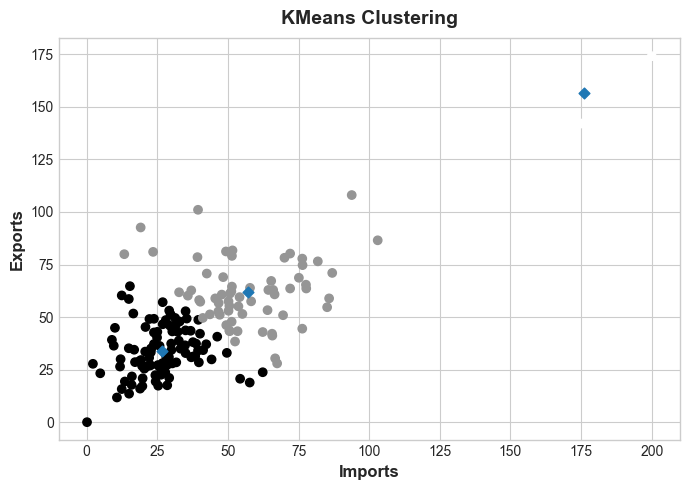

In [195]:
# Membuat grafik Kmeans dengan centroid
plt.figure(1, figsize=(7,5))
plt.scatter(points["exports"], points["imports"], alpha=1, c=labels)
plt.scatter(ctr[:,0], ctr[:,1], marker="D", s=30)
plt.title("KMeans Clustering")
plt.xlabel("Imports")
plt.ylabel("Exports")
plt.show()


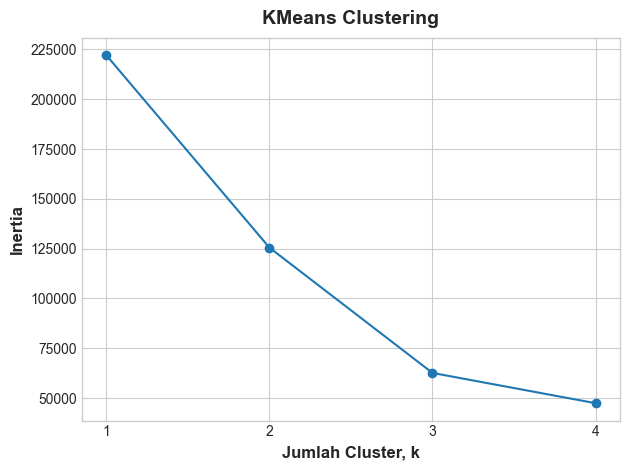

In [196]:
# Elbow Method | Inertia | mencari cluster yang optimal

cluster_sum = range(1,5)
inertia = []

for cluster in cluster_sum:
    model = KMeans(n_clusters=cluster)
    model.fit(points)
    inertia.append(model.inertia_)
    
plt.plot(cluster_sum, inertia, '-o')
plt.xticks(cluster_sum)
plt.title("KMeans Clustering")
plt.xlabel("Jumlah Cluster, k")
plt.ylabel("Inertia")
plt.show()

In [197]:
# Hierarchical Clustering

In [198]:
# Mengabil baris n colom yang akan digunakan
points_linkage = df_country.iloc[:, [2,5,]].values
points_complete = df_country.iloc[:, [2,6,]].values

In [199]:
# Menentukan algoritma similarity yang digunakan
hr_linkage = linkage(points_linkage, method='ward')
hr_complete = complete(points_complete)

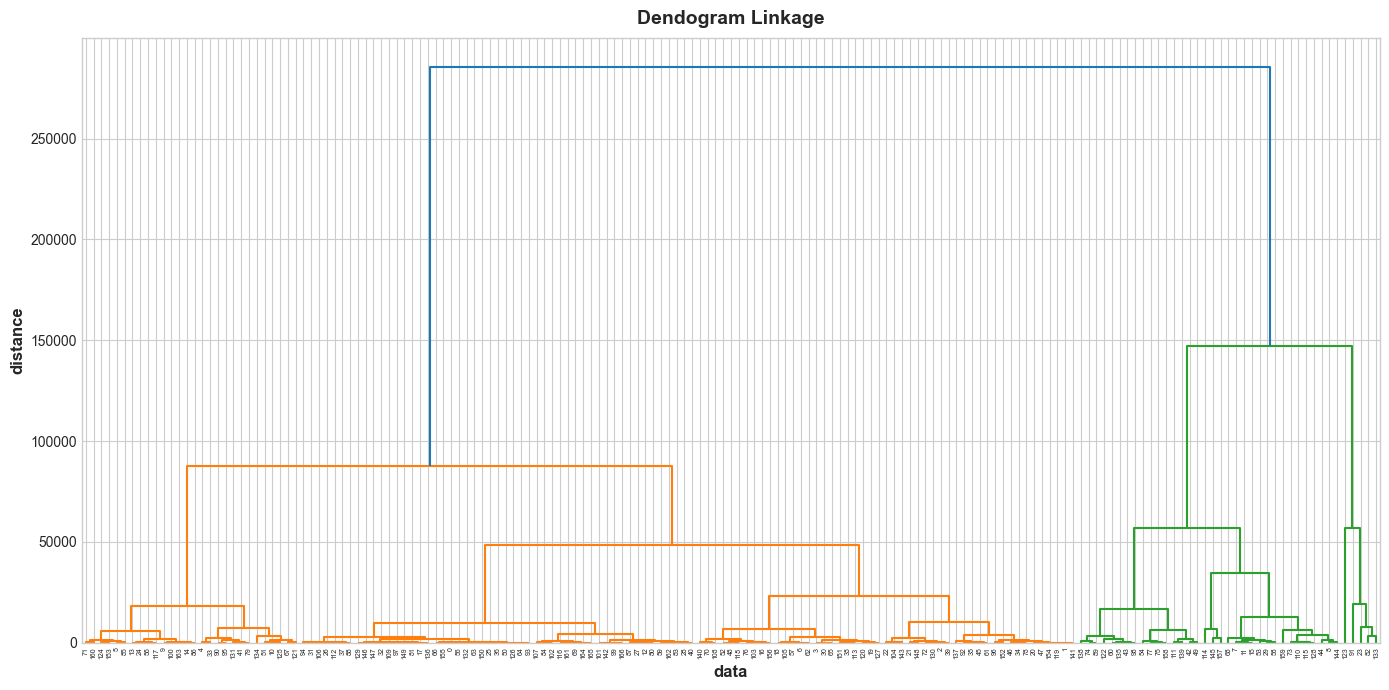

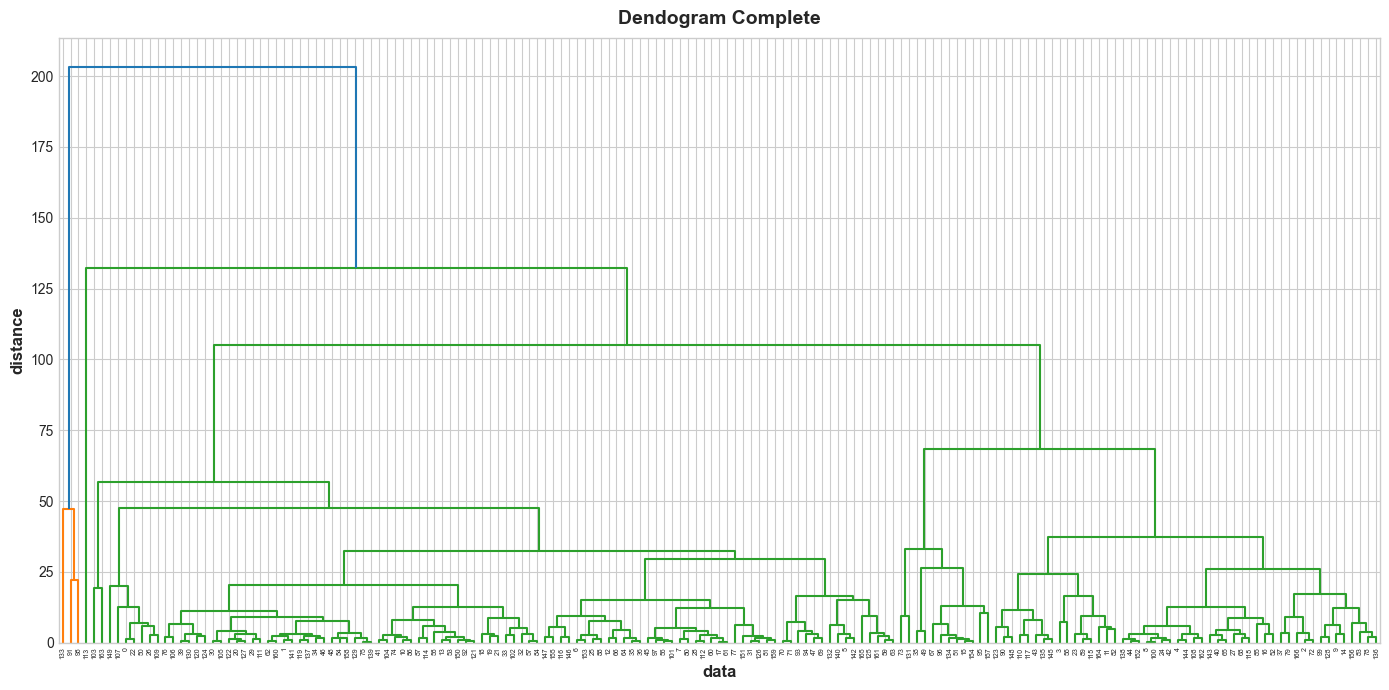

In [200]:
# Visualisasi hasil model Dendogram Linkage | Hierarchical Clustering
plt.figure(1, figsize=(14, 7))
dendrogram(hr_linkage)
plt.title('Dendogram Linkage')
plt.xlabel('data')
plt.ylabel('distance')

# Visualisasi hasil model Dendogram Complete | Hierarchical Clustering
plt.figure(2, figsize=(14, 7))
dendrogram(hr_complete)
plt.title('Dendogram Complete')
plt.xlabel('data')
plt.ylabel('distance')

plt.show()

In [204]:
# Hierarchical Clustering | Agglomerative 

In [205]:
# Menentukan jenis hierarchy yang digunakan
ag_linkage = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ag_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean')

In [206]:
# Training model
pr_linkage = ag_linkage.fit_predict(points_linkage)
pr_complete = ag_complete.fit_predict(points_complete)

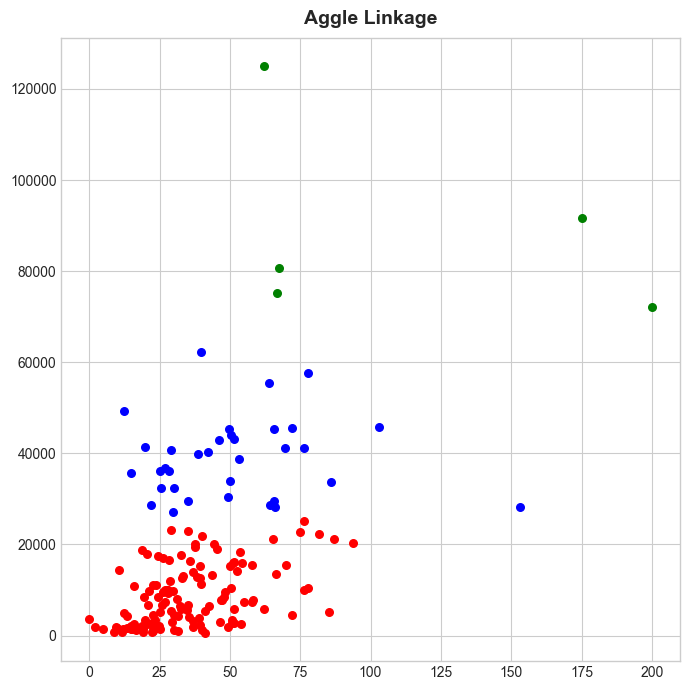

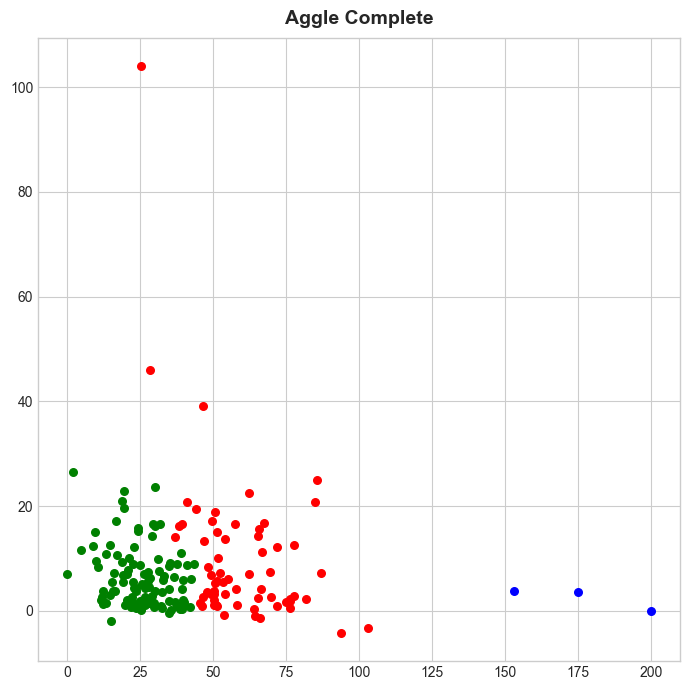

In [207]:
# Visualisasi hasil model Aggle Linkage | Hierarchical Clustering
plt.figure(1, figsize=(7,7))
plt.scatter(points_linkage[pr_linkage==0,0], points_linkage[pr_linkage==0,1], s=30, c='red')
plt.scatter(points_linkage[pr_linkage==1,0], points_linkage[pr_linkage==1,1], s=30, c='green')
plt.scatter(points_linkage[pr_linkage==2,0], points_linkage[pr_linkage==2,1], s=30, c='blue')
plt.title('Aggle Linkage')

# Visualisasi hasil model Aggle Complete | Hierarchical Clustering
plt.figure(2, figsize=(7,7))
plt.scatter(points_complete[pr_complete==0,0], points_complete[pr_complete==0,1], s=30, c='red')
plt.scatter(points_complete[pr_complete==1,0], points_complete[pr_complete==1,1], s=30, c='green')
plt.scatter(points_complete[pr_complete==2,0], points_complete[pr_complete==2,1], s=30, c='blue')
plt.title('Aggle Complete')

plt.show()

In [212]:
# :D